# <center>**FINANCIAL INCLUSION**</center>

## **Overview**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## **Objective**

The objective of this project is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

## **Dataset**

1. A Variables file - a csv file containing descriptions of all the columns in the training and test datasets below.

2. A training set - a csv file containing different interviewee demographics and whether or not they have a bank account.

3. A test set - a csv file containig the demographics from different interviewees. This is the file we use for predictions.

Source: [Link](https://zindi.africa/competitions/financial-inclusion-in-africa/data)

## **Approach**


### Tools


*   Streamlit
*   Numpy
*   Pandas
*   ScikitLearn
*   Matplotlib
*   Seaborn
*   Scipy
*   List item




### Steps

1. Exploratory Data Analysis

2. Data Cleaning

3. Data Analysis

4. Modelling

5. Testing

6. Publishing - Data App 

In [ ]:
#KEY INDICATORS IN MODELING: pple likely to open a bnk ac and use it
#Screening criteria to be used by bank owners
#Output for classification; probability

## Import data & dependancies

In [ ]:
# Reading data and data manipulation
import pandas as pd
# Mathematical operations and working with arrays
import numpy as np
# Import Matplotlib a library used for visualisations
import matplotlib.pyplot as plt
# import seaborn , a visualisation library.
import seaborn as sns
#Statistical library
from scipy import stats
#Google Drive folder
from google.colab import  drive
# Import Laber Encoder from scikit-learn
from sklearn.preprocessing import LabelEncoder
# Import train/test split
from sklearn.model_selection import train_test_split
#Ignore warnings
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
#Mount Google drive folder

# drive.mount('/content/gdrive')

In [ ]:
#load the dataset

# finance = pd.read_csv('/content/gdrive/My Drive/dsproj_kamilimu/financial.csv')
# finance = pd.read_csv('financial.csv')
finance = pd.read_excel('financial.xlsx')
#View the first few rows of the dataset

finance.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Inspecting the data


In [ ]:
print("Number of columns: " + str(finance.shape[1]))
print("Number of rows: "  + str(finance.shape[0]))

Number of columns: 13
Number of rows: 23524


In [ ]:
# Number of records in our dataset
finance.count()

country                   23524
year                      23524
uniqueid                  23524
bank_account              23524
location_type             23524
cellphone_access          23524
household_size            23524
age_of_respondent         23524
gender_of_respondent      23524
relationship_with_head    23524
marital_status            23524
education_level           23524
job_type                  23524
dtype: int64

In [ ]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# Summary statistics of the finance dataframe.
finance.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [ ]:
# Range of data.
finance.index

RangeIndex(start=0, stop=23524, step=1)

In [ ]:
# Columns
finance.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [ ]:
# Unique items in each item column
finance.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [ ]:
# Countries
finance['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [ ]:
# Unique IDs
finance['uniqueid'].unique()

array(['uniqueid_1', 'uniqueid_2', 'uniqueid_3', ..., 'uniqueid_8757',
       'uniqueid_8758', 'uniqueid_8759'], dtype=object)

In [ ]:
# Unique job types
finance['job_type'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

In [ ]:
# Unique genders
finance['gender_of_respondent'].unique()

array(['Female', 'Male'], dtype=object)

## Data cleaning

In [ ]:
#Dealing with missing values

finance.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [ ]:
#Checking for duplicates

print(finance.duplicated().any())

False


In [ ]:
#Checking outliers

num = ['age_of_respondent']
for i, col in enumerate(num):
    z = np.abs(stats.zscore(finance[col]))
print(z)

[0.89618796 1.88827897 0.77512418 ... 0.71459229 0.53299662 1.13831551]


In [ ]:
#Confirming that our outliers have been dropped from the data set

finance2 = finance[( z < 2 )]

print(f"Previous dataframe size : {finance.shape[0]}" )
print(f"New dataframe size : {finance2.shape[0]}" )

Previous dataframe size : 23524
New dataframe size : 22390


In [ ]:
finance2.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Check for outliers in the year, age and household size properties


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

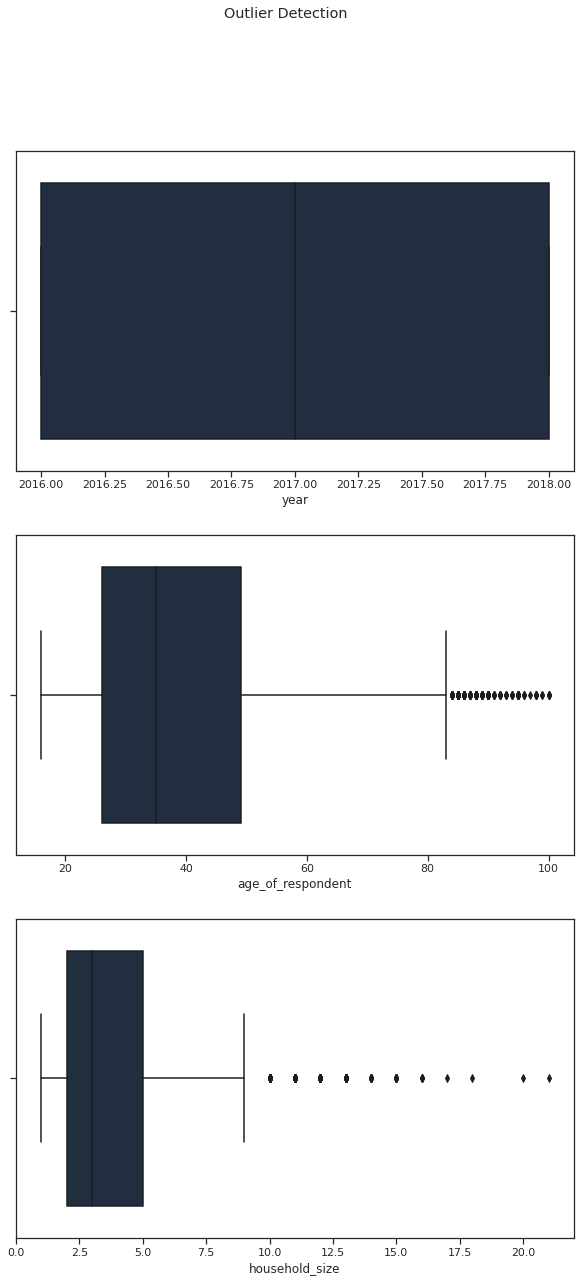

In [ ]:
fig, (ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,20))

fig.suptitle('Outlier Detection')

sns.boxplot(finance['year'], ax= ax1, orient = 'v')
sns.boxplot(finance['age_of_respondent'],ax = ax2, orient = 'v')
sns.boxplot(finance['household_size'], ax = ax3, orient = 'v')

In [ ]:
# Check the values lying in the upper and lower quantile
Q1 = finance.quantile(0.25)
Q3 = finance.quantile(0.75)
IQR = Q3 - Q1
IQR

year                  2.0
household_size        3.0
age_of_respondent    23.0
dtype: float64

In [ ]:
# Drop values using in the upper and lower quanitle
finance3 = finance[~((finance < (Q1 - 1.5 * IQR)) |(finance > (Q3 + 1.5 * IQR))).any(axis=1)]
finance3.shape

(22902, 13)

## Exploratory Data Analysis

### Univariate analysis
Statistical analysis on where one variable is involved

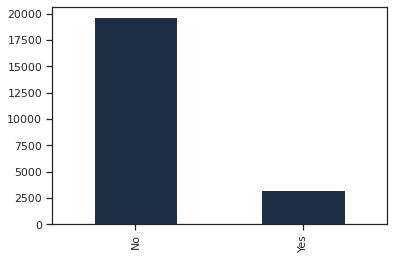

In [ ]:
# Check how many people have/don't have bank accounts
finance3['bank_account'].value_counts().plot(kind ='bar');

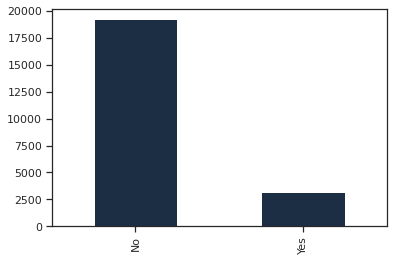

In [ ]:
finance2['bank_account'].value_counts().plot(kind ='bar');


> Most east africans do not have bank accounts

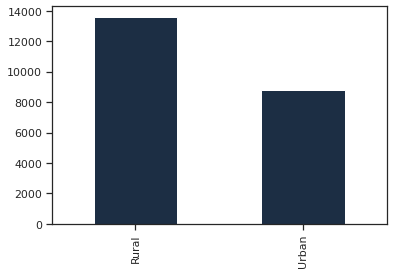

In [ ]:
# Check where people are located
finance2['location_type'].value_counts().plot(kind= 'bar');

> The distribution of the Rural and Urban population is almost equal with the majoity of people living in the rural areas.

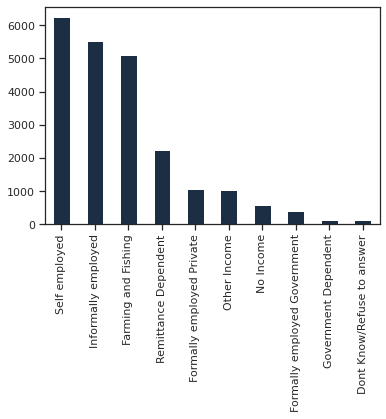

In [ ]:
finance2['job_type'].value_counts().plot(kind= 'bar');

> Most of the people who answered the survey , were mostly self employed and informally employed, or practicing farming and fishing.

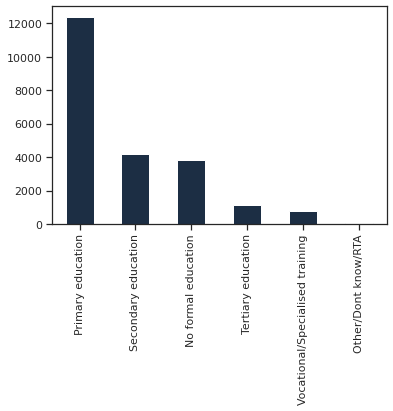

In [ ]:
finance2['education_level'].value_counts().plot(kind= 'bar');

> Most of the people in the survay have have attained a primary education.

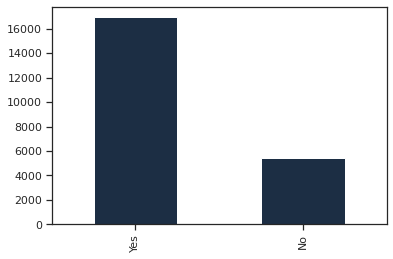

In [ ]:
finance2['cellphone_access'].value_counts().plot(kind= 'bar');

> Most people have access to a cell phone

### Bivariate analysis
Analysis of two variables to determine relationships between them

##### *The countplot below shows the proportion of people in different East African Countries with and without bank accounts.*

##### *Kenya has more people with bank accounts compared to the rest of the countries.*
##### Could it be because of demographic factors such as, level of education? employment type? Marital Satus? We find out in succeeding visualizations.

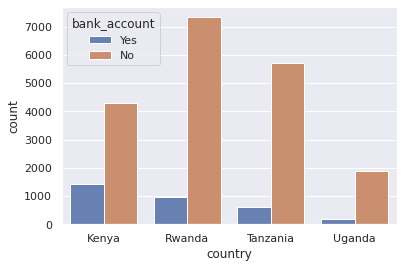

In [ ]:
# #Let us see how many counts we have of each Country

sns.set_theme(style="darkgrid", font='sans-serif', context='notebook') #Styles include: darkgrid, ticks
finance2['country'].value_counts()
sns.set_palette('muted', 10, .75, 'bright')
sns.countplot(x='country',data=finance2, hue='bank_account')

#### *The countplot below shows the number of people in the different countries based on their levels of education*

#### *It shows that a majority of the population in Rwanda have Primary-level of education compared to the rest of the countries. Kenya has more people with both tertiary and vocational levels of education in contrast to the other EA countries.*

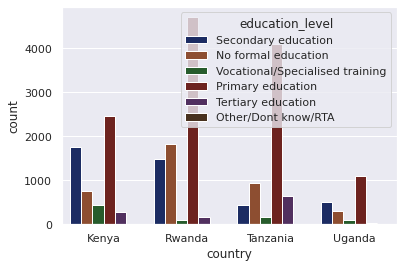

In [ ]:
# #Let us see how many counts we have of each location_type

finance2['country'].value_counts()
sns.set_palette('dark', 10, .75, 'dark')
sns.countplot(x='country',data=finance2, hue='education_level')

#### *The violin plot below shows the distribution of people with or without bank accounts based on their ages*

#### *The median age for people with bank accounts is approximately 35 yrs across all the EA countries. Majority of people below 40 yrs have bank accounts.*

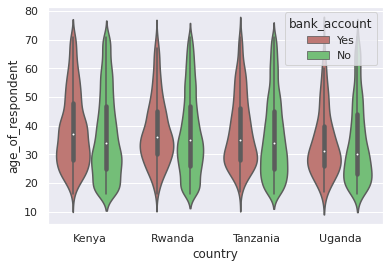

In [ ]:
sns.set_palette('hls', 3, .75, 'deep')
sns.violinplot(x="country", y="age_of_respondent", hue="bank_account", data=finance2)

**Level of Education Vs Bank Account Ownership**

#### *A count plot to check for how education level compares to posession of a bank account reveals that a large number with tertiary and vocational education have bank accounts while a greater percentage of those with primary level of education do not have bank accounts.* 

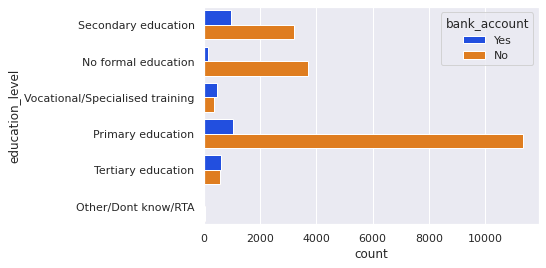

In [ ]:
#How education level affects bank account ownership

sns.set_palette("bright", 8)
sns.countplot(y='education_level',data=finance2, hue='bank_account',)

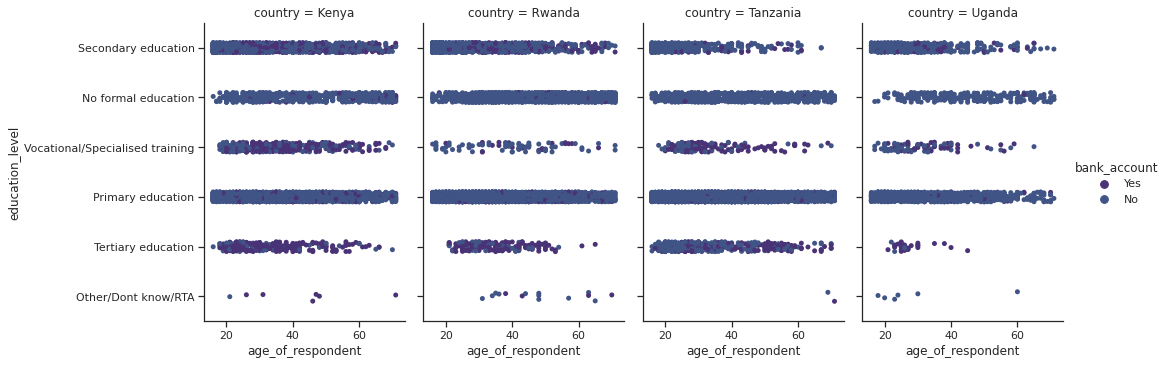

In [ ]:
sns.set_theme(style='ticks', font='sans-serif')
sns.set_palette('viridis', 7, .87, 'bright')
sns.catplot(y='education_level', x='age_of_respondent', hue='bank_account', data=finance2, height=5, col='country', aspect=.75)

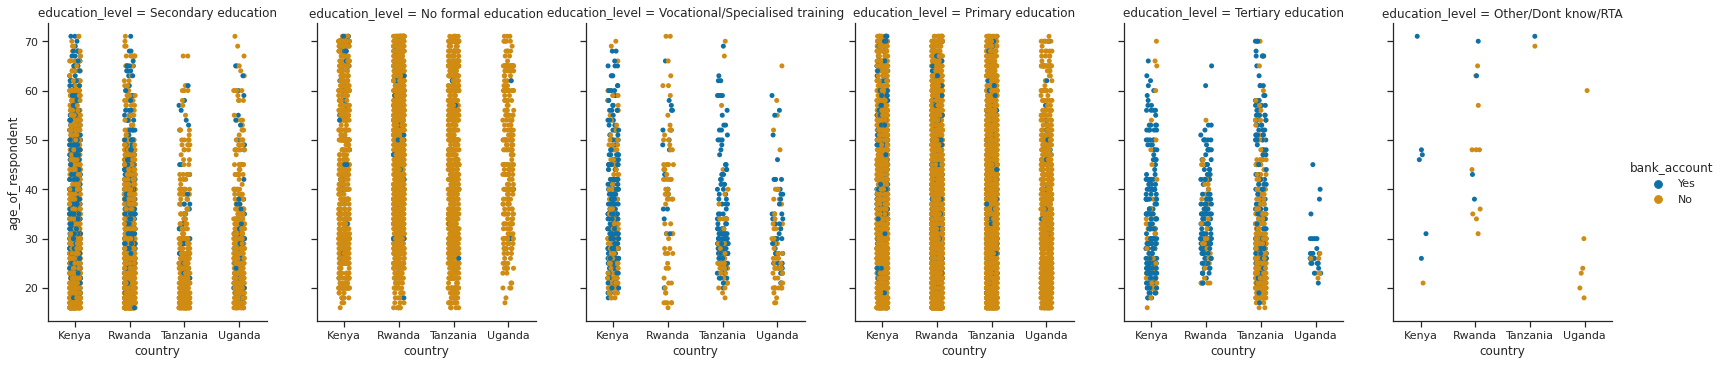

In [ ]:
sns.set_theme(style='ticks', font='sans-serif')
sns.set_palette('colorblind', 5, .87, 'deep')
sns.catplot(x='country', y='age_of_respondent', hue='bank_account', data=finance2, height=5, col='education_level', aspect=.75)

**Gender Vs Bank Account**

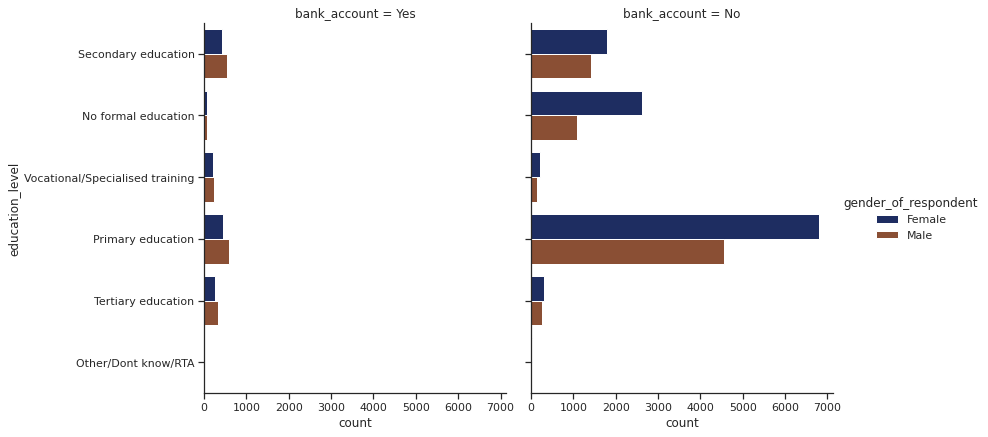

In [ ]:
sns.set_palette('dark', 10, .7, 'colorblind')
g = sns.catplot(y="education_level", hue="gender_of_respondent", col="bank_account",
                data=finance2, kind="count",
                height=6, aspect=1.0);
                

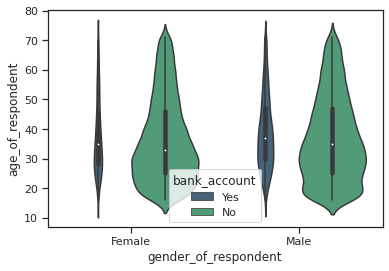

In [ ]:
sns.set_palette('viridis', 2, .75, 'deep')
sns.violinplot(x="gender_of_respondent", y="age_of_respondent", hue="bank_account", data=finance2, scale='count')

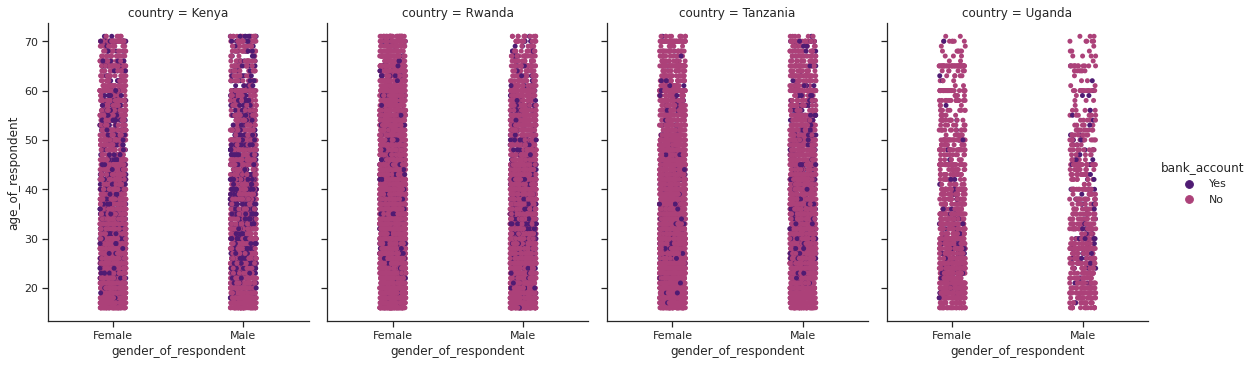

In [ ]:
sns.set_theme(style='ticks', font='sans-serif')
sns.set_palette('magma', 3, .84, 'colorblind')
sns.catplot(x="gender_of_respondent", y="age_of_respondent", hue="bank_account",
                col="country", data=finance2,
                height=5, aspect=.8)

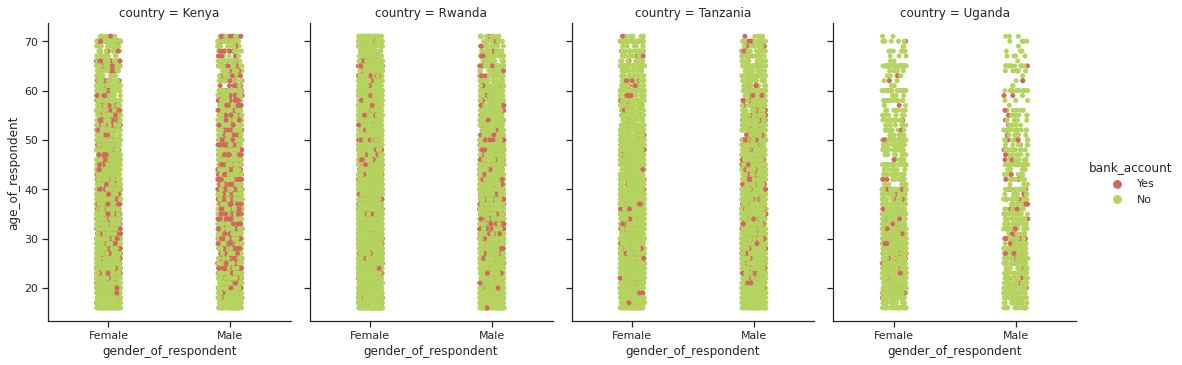

In [ ]:
sns.set_theme(style='ticks', font='sans-serif')
sns.set_palette('hls', 5, .87, 'deep')
sns.catplot(x='gender_of_respondent', y='age_of_respondent', hue='bank_account', data=finance2, height=5, col='country', aspect=.75)

**Marital Status Vs Bank Ownership**

#### *There are more married people with bank accounts than single, widowed or divorced*

'There are more married pple with bank accounts compared to the rest.'

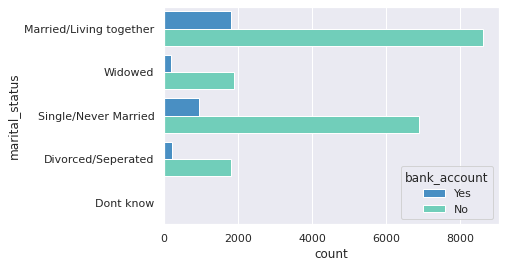

In [ ]:
#How bank account ownership is affected by marital statuses
sns.set_theme(style='darkgrid', font='sans-serif')
sns.set_palette("rainbow", 4, .75, 'dark')
sns.countplot(y='marital_status',data=finance2, hue='bank_account')

"""There are more married pple with bank accounts compared to the rest."""
#Investigate this graph for different countries

'education>>bank account/cellphone access\njob type >> bank account/cellphone access'

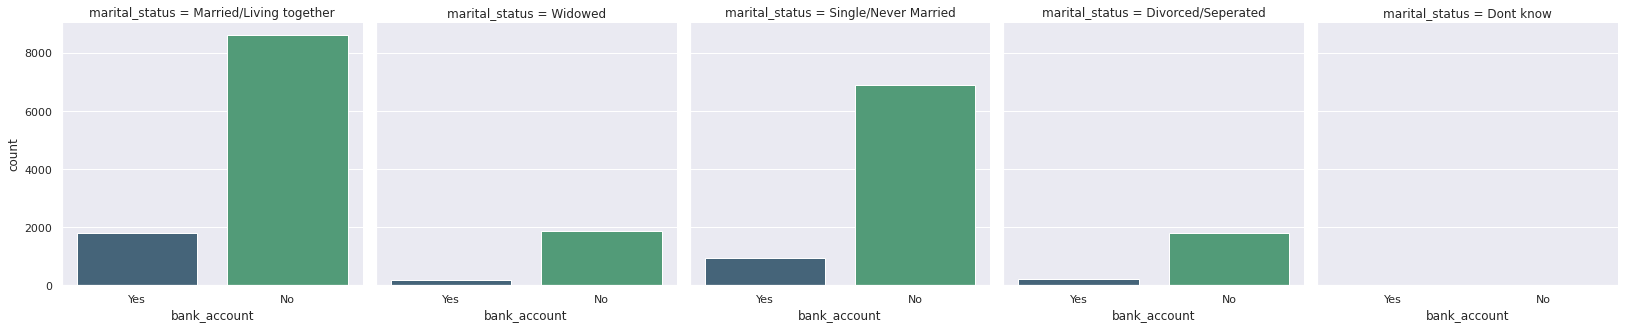

In [ ]:
sns.set_palette("viridis", 2, .75, 'dark')
sns.catplot(x="bank_account", col="marital_status", col_wrap=5,
                data=finance2[finance2.marital_status.notnull()],
                kind="count", height=4.5, aspect=1.0)

#Cant clearly visualize the level of education;features with many categorical variables. How to solve this?
#Change to violin or bar by introducing a y parameter to the code
"""education>>bank account/cellphone access
job type >> bank account/cellphone access"""

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 97.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use

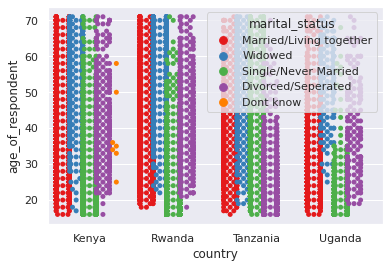

In [ ]:
sns.swarmplot(x='country',y="age_of_respondent",hue='marital_status',data=finance2,palette="Set1", split=True)

**Cellphone Access Vs Bank Account**

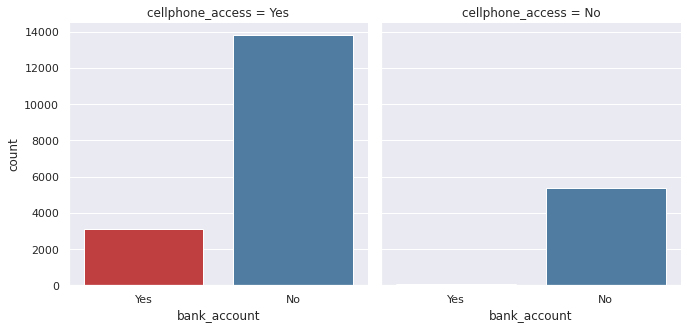

In [ ]:
sns.set_theme(style='darkgrid', font='sans-serif')
sns.set_palette('Set1', 3, .84, 'colorblind')
sns.catplot(x="bank_account", col="cellphone_access", col_wrap=5,
                data=finance2[finance2.cellphone_access.notnull()],
                kind="count", height=4.5, aspect=1.0)


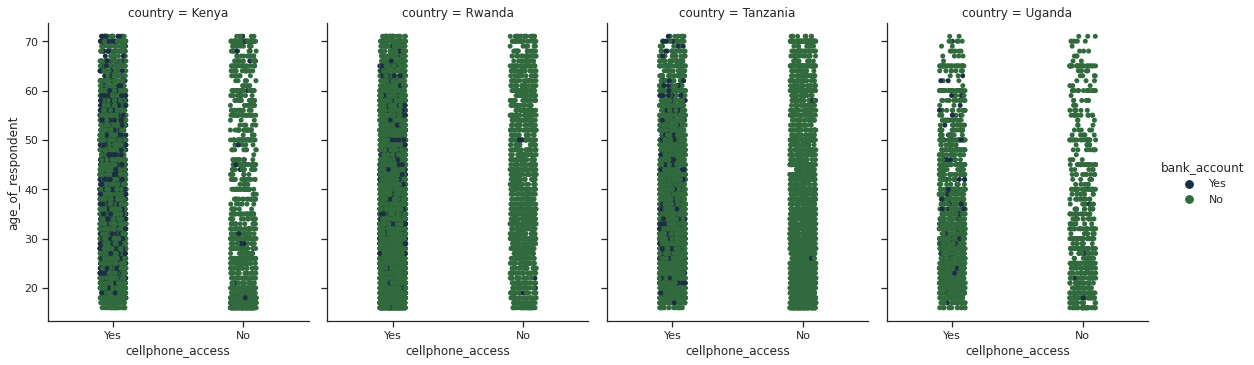

In [ ]:
sns.set_theme(style='ticks', font='sans-serif')
sns.set_palette('cubehelix', 5, .84, 'colorblind')
sns.catplot(x="cellphone_access", y="age_of_respondent", hue="bank_account",
                col="country", data=finance2,
                height=5, aspect=.8)

### Correlation matrix

In [ ]:
finance.head()

finance4 = finance

finance4.head()
finance.shape
# type(finance4)

(23524, 13)

In [ ]:
kenya = finance.loc[finance['country'] == 'Kenya']
kenya.shape

(6068, 13)

In [ ]:
kenya.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,0,uniqueid_1,1,0,1,3,24,0,5,2,3,8
1,Kenya,0,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,Kenya,0,uniqueid_3,1,1,1,5,26,1,3,3,5,8
3,Kenya,0,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,Kenya,0,uniqueid_5,0,1,0,8,26,1,0,3,2,5


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0, 1,2])], remainder='passthrough')
# print( np.array(columnTransformer.fit_transform(finance4), dtype = np.str))
# finance5 =  pd.DataFrame(np.array(columnTransformer.fit_transform(finance4), dtype = np.str), columns = finance5.columns.values)

finance.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
# Convert catergorical data to Numerical data
en = LabelEncoder()
kenya['education_level'] = en.fit_transform(kenya['education_level'])
kenya['job_type'] = en.fit_transform(kenya['job_type'])
kenya['relationship_with_head'] = en.fit_transform(kenya['relationship_with_head'])
kenya['cellphone_access'] = en.fit_transform(kenya['cellphone_access'])
kenya['gender_of_respondent'] = en.fit_transform(kenya['gender_of_respondent'])
kenya['marital_status'] = en.fit_transform(kenya['marital_status'])
kenya['bank_account'] = en.fit_transform(kenya['bank_account'])
kenya['location_type'] = en.fit_transform(kenya['location_type'])
kenya['year'] = en.fit_transform(kenya['year'])
kenya['relationship_with_head'] = en.fit_transform(kenya['relationship_with_head'])
kenya['marital_status'] = en.fit_transform(kenya['marital_status'])
kenya.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,0,uniqueid_1,1,0,1,3,24,0,5,2,3,8
1,Kenya,0,uniqueid_2,0,0,0,5,70,0,1,4,0,4
2,Kenya,0,uniqueid_3,1,1,1,5,26,1,3,3,5,8
3,Kenya,0,uniqueid_4,0,0,1,5,34,0,1,2,2,3
4,Kenya,0,uniqueid_5,0,1,0,8,26,1,0,3,2,5


In [ ]:
kenya = kenya.drop(['uniqueid', 'country'], axis=1)
# kenya['year'].unique()
kenya.head()

In [ ]:
kenya.head()

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,1,0,1,3,24,0,5,2,3,8
1,0,0,0,0,5,70,0,1,4,0,4
2,0,1,1,1,5,26,1,3,3,5,8
3,0,0,0,1,5,34,0,1,2,2,3
4,0,0,1,0,8,26,1,0,3,2,5


In [ ]:
# Correlation marix
corrMatrix = kenya.corr()
corrMatrix

,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bank_account,NaN,1.000000,0.211441,0.241747,-0.143545,0.042277,0.132868,-0.041146,-0.030929,0.340359,-0.035666
location_type,NaN,0.211441,1.000000,0.163659,-0.192669,-0.163688,0.015496,-0.020789,-0.036299,0.277652,0.240210
cellphone_access,NaN,0.241747,0.163659,1.000000,-0.080918,-0.042122,0.061028,0.052942,-0.154928,0.271165,-0.048161
household_size,NaN,-0.143545,-0.192669,-0.080918,1.000000,-0.153571,-0.020144,0.120797,-0.086727,-0.133343,-0.040848
age_of_respondent,NaN,0.042277,-0.163688,-0.042122,-0.153571,1.000000,0.021379,-0.050097,0.068490,-0.323810,-0.214022
gender_of_respondent,NaN,0.132868,0.015496,0.061028,-0.020144,0.021379,1.000000,-0.444439,-0.098464,0.128156,-0.053108
relationship_with_head,NaN,-0.041146,-0.020789,0.052942,0.120797,-0.050097,-0.444439,1.000000,-0.207054,-0.046915,-0.051519
marital_status,NaN,-0.030929,-0.036299,-0.154928,-0.086727,0.068490,-0.098464,-0.207054,1.000000,-0.024027,0.042539
education_level,NaN,0.340359,0.277652,0.271165,-0.133343,-0.323810,0.128156,-0.046915,-0.024027,1.000000,0.093861


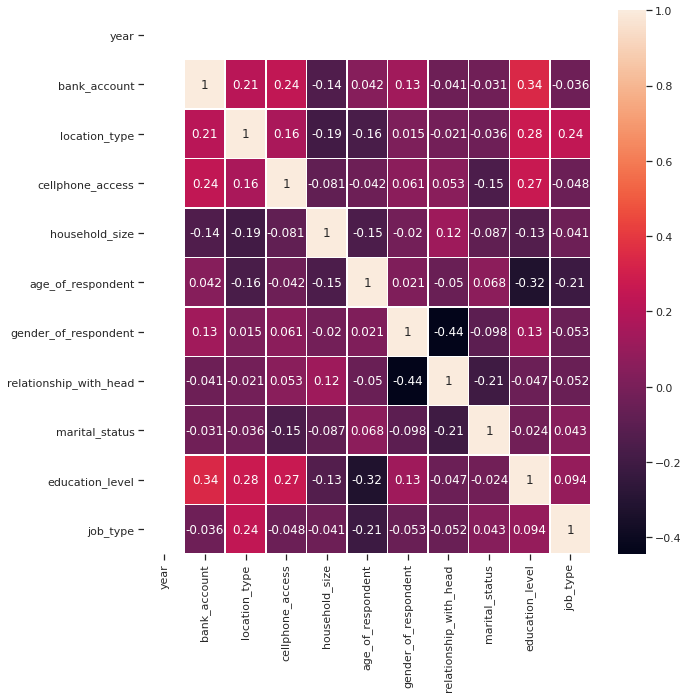

In [ ]:
# Visual rep of correlation map
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax);

## Classification: K-Nearest Neighbor

In [ ]:
# finance.to_numpy()

'bank_account'

In [ ]:
# Feature matrix in a object named X
X = kenya.to_numpy()

# response vector in a object named y
# y = kenya.columns
y = kenya.bank_account

In [ ]:
X = finance.to_numpy()

# response vector in a object named y
# y = kenya.columns
y = finance.bank_account

In [ ]:
print(X.shape)
print(y.shape)
# X = X.transpose()
print(X.shape)

(23524, 13)
(23524,)
(23524, 13)


### Train the model

In [ ]:
# splitting the data into training and test sets (80:20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

#shape of train and test objects
print(X_train.shape)
print(X_test.shape)

(18819, 13)
(4705, 13)


In [ ]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test,)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

ValueError: ignored

In [ ]:
#Testing accuracy for each value of K
scores

{1: 0.8640856672158155,
 2: 0.8434925864909391,
 3: 0.8583196046128501,
 4: 0.8377265238879736,
 5: 0.8558484349258649,
 6: 0.8369028006589786,
 7: 0.842668863261944,
 8: 0.828665568369028,
 9: 0.8451400329489291,
 10: 0.8270181219110379,
 11: 0.8352553542009885,
 12: 0.8261943986820428,
 13: 0.8327841845140033,
 14: 0.8163097199341022,
 15: 0.8228995057660626,
 16: 0.8163097199341022,
 17: 0.8237232289950577,
 18: 0.8121911037891268,
 19: 0.8179571663920923,
 20: 0.8088962108731467,
 21: 0.8154859967051071,
 22: 0.8031301482701813,
 23: 0.8105436573311368,
 24: 0.7990115321252059,
 25: 0.8080724876441515}

Text(0, 0.5, 'Testing Accuracy')

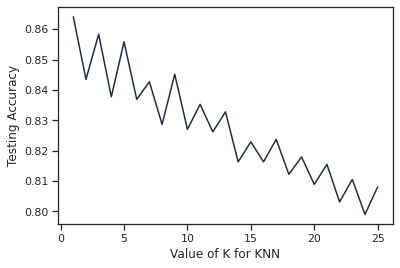

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

In [ ]:

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x_new = [[3,4,5,2],
         [5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])